In [30]:
# Imports

import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image

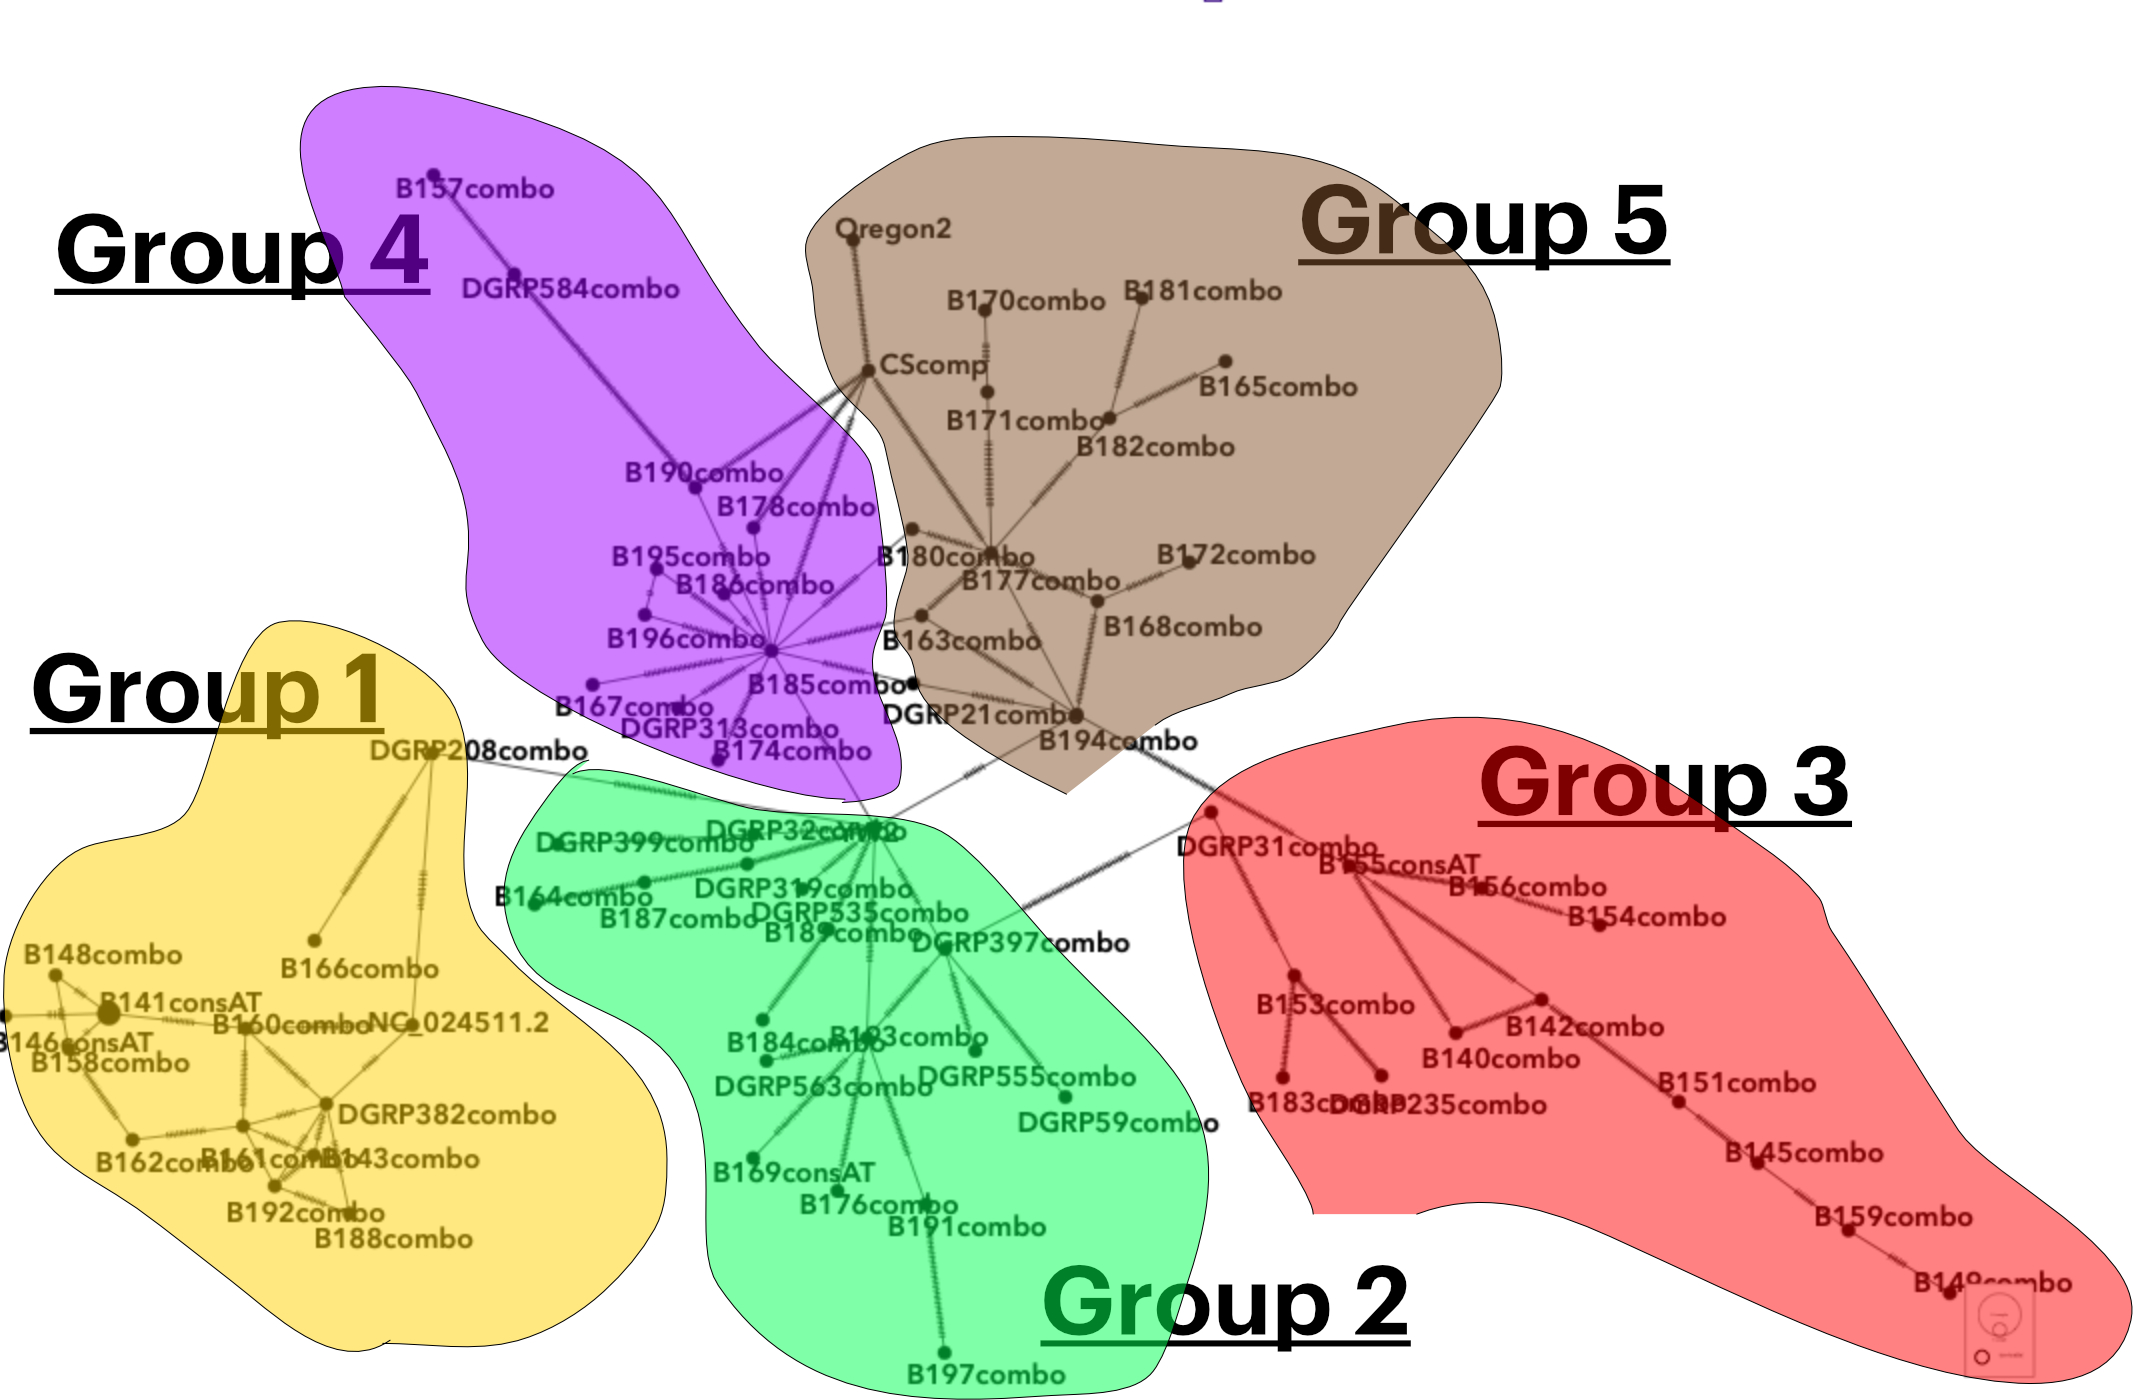

In [24]:
Image(filename='blobs.jpg') 

In [25]:
df_fly = pd.read_csv("mt_fly_strain.csv")

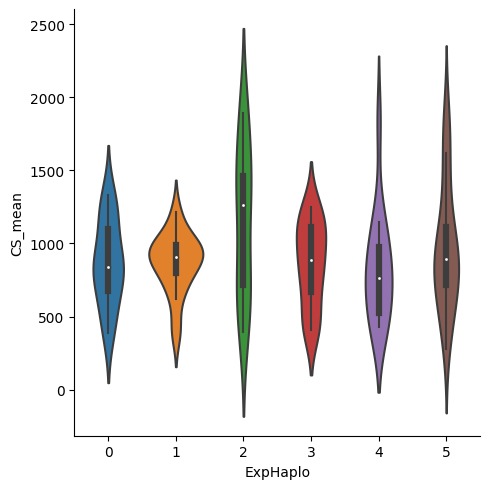

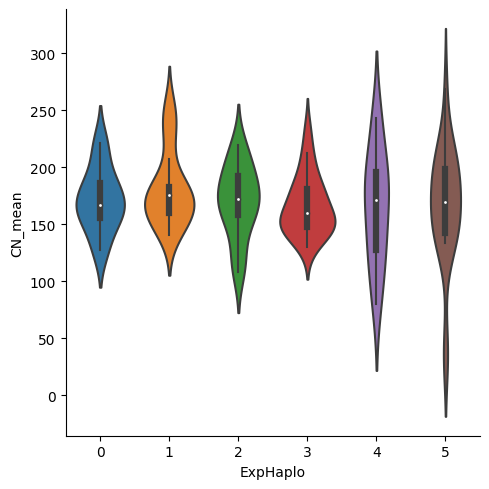

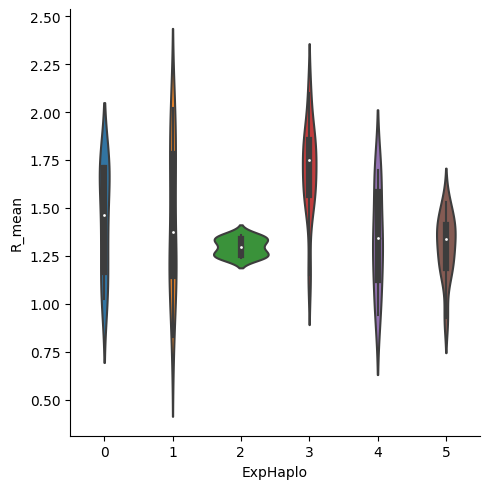

In [26]:
#Haplotype vs. phenotype

sns.catplot(data=df_fly, x="ExpHaplo", y="CS_mean", kind="violin")
sns.catplot(data=df_fly, x="ExpHaplo", y="CN_mean", kind="violin")
sns.catplot(data=df_fly, x="ExpHaplo", y="R_mean", kind="violin")

In [40]:
#Grouping Citrate Synthase by Exploratory Haplotype
groups = df_fly.groupby('ExpHaplo')['CS_mean']

hap0 = groups.get_group(0).values
hap1 = groups.get_group(1).values
hap2 = groups.get_group(2).values
hap3 = groups.get_group(3).values
hap4 = groups.get_group(4).values
hap5 = groups.get_group(5).values

# Drop rows with missing values
df_fly.dropna(subset=['R_mean', 'CS_mean'], inplace=True)

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(hap0, hap1, hap2, hap3, hap4, hap5)

# Print the results
print('F statistic:', f_statistic)
print('p value:', p_value)

F statistic: 1.8545937153809022
p value: 0.10870178932940018


In [38]:
#Grouping Copy Number by Exploratory Haplotype
groups = df_fly.groupby('ExpHaplo')['CN_mean']

hap0 = groups.get_group(0).values
hap1 = groups.get_group(1).values
hap2 = groups.get_group(2).values
hap3 = groups.get_group(3).values
hap4 = groups.get_group(4).values
hap5 = groups.get_group(5).values

# Drop rows with missing values in the R_mean or ExpHaplo column
df_fly.dropna(subset=['R_mean', 'CN_mean'], inplace=True)

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(hap0, hap1, hap2, hap3, hap4, hap5)

# Print the results
print('F statistic:', f_statistic)
print('p value:', p_value)

F statistic: 0.5995761788499393
p value: 0.7003287172194697


In [41]:
#Grouping Respiration Rate by Exploratory Haplotype
groups = df_fly.groupby('ExpHaplo')['R_mean']

hap0 = groups.get_group(0).values
hap1 = groups.get_group(1).values
hap2 = groups.get_group(2).values
hap3 = groups.get_group(3).values
hap4 = groups.get_group(4).values
hap5 = groups.get_group(5).values

# Drop rows with missing values in the R_mean or ExpHaplo column
df_fly.dropna(subset=['R_mean', 'ExpHaplo'], inplace=True)

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(hap0, hap1, hap2, hap3, hap4, hap5)

# Print the results
print('F statistic:', f_statistic)
print('p value:', p_value)


F statistic: 7.060476012444355
p value: 1.0166155626787221e-05


In [36]:
# Perform Tukey's HSD test for pairwise comparisons

posthoc = mc.MultiComparison(df_fly['R_mean'], df_fly['ExpHaplo'])
result = posthoc.tukeyhsd()

# Print the results of Tukey's HSD test
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0162    1.0 -0.2389  0.2713  False
     0      2  -0.1391  0.678 -0.4122  0.1339  False
     0      3   0.2566 0.0477  0.0015  0.5117   True
     0      4  -0.1003 0.9058 -0.3823  0.1817  False
     0      5  -0.1399 0.6055  -0.395  0.1152  False
     1      2  -0.1553 0.4452 -0.4005  0.0898  False
     1      3   0.2404 0.0289  0.0155  0.4654   True
     1      4  -0.1165 0.7699 -0.3716  0.1386  False
     1      5  -0.1561 0.3414  -0.381  0.0689  False
     2      3   0.3957 0.0001  0.1506  0.6409   True
     2      4   0.0388 0.9984 -0.2342  0.3119  False
     2      5  -0.0007    1.0 -0.2459  0.2444  False
     3      4  -0.3569 0.0013  -0.612 -0.1019   True
     3      5  -0.3965    0.0 -0.6214 -0.1715   True
     4      5  -0.0396 0.9976 -0.2946  0.2155  False
----------------------------------------------

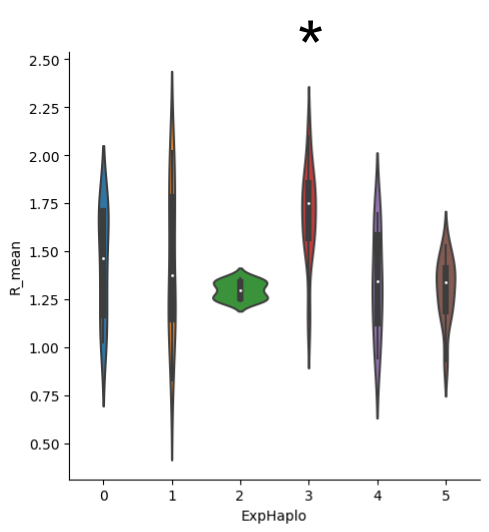

In [44]:
Image(filename='statsig.jpg')

#Asterisk denotes group different from all other groups by pairwise comparison

In [43]:
Previous Cells:
    
#Categorical by Sex 

sns.catplot(data=df_fly, x="sex", y="CS_mean", kind="violin")
sns.catplot(data=df_fly, x="sex", y="CN_mean", kind="violin")
sns.catplot(data=df_fly, x="sex", y="R_mean", kind="violin")

#Categorical by Region

sns.catplot(data=df_fly, x="region", y="CS_mean", hue="region")
sns.catplot(data=df_fly, x="region", y="CN_mean", hue="region")
sns.catplot(data=df_fly, x="region", y="R_mean", hue="region")

#Categorical by Group

sns.catplot(data=df_fly, x="group", y="CS_mean", hue="group")
sns.catplot(data=df_fly, x="group", y="CN_mean", hue="group")
sns.catplot(data=df_fly, x="group", y="R_mean", hue="group")

#Simple Linear Regression I: CN vs CS

x = df_male["CS_mean"]
y = df_male["ATNumSNPs"]

x = sm.add_constant(x)

sim_line = sm.OLS(y, x, missing='drop')
result = sim_line.fit()

print(result.summary())

SyntaxError: invalid syntax (2374100912.py, line 1)